# Predicting treatment outcomes for patients with HIV

### Loading the dataset

In [1]:
#pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# Print variable information 
print(aids_clinical_trials_group_study_175.variables) 

## Code source: https://github.com/uci-ml-repo/ucimlrepo

       name     role        type         demographic  \
0    pidnum       ID     Integer                None   
1       cid   Target      Binary                None   
2      time  Feature     Integer                None   
3       trt  Feature     Integer                None   
4       age  Feature     Integer                 Age   
5      wtkg  Feature  Continuous                None   
6      hemo  Feature      Binary                None   
7      homo  Feature      Binary  Sexual Orientation   
8     drugs  Feature      Binary                None   
9    karnof  Feature     Integer                None   
10   oprior  Feature      Binary                None   
11      z30  Feature      Binary                None   
12   zprior  Feature      Binary                None   
13  preanti  Feature     Integer                None   
14     race  Feature     Integer                Race   
15   gender  Feature      Binary              Gender   
16     str2  Feature      Binary                

In [2]:
# Let's see the first few rows of the data
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,1,3,0,0,0,504,353,870,782


## Statistics and visualisation

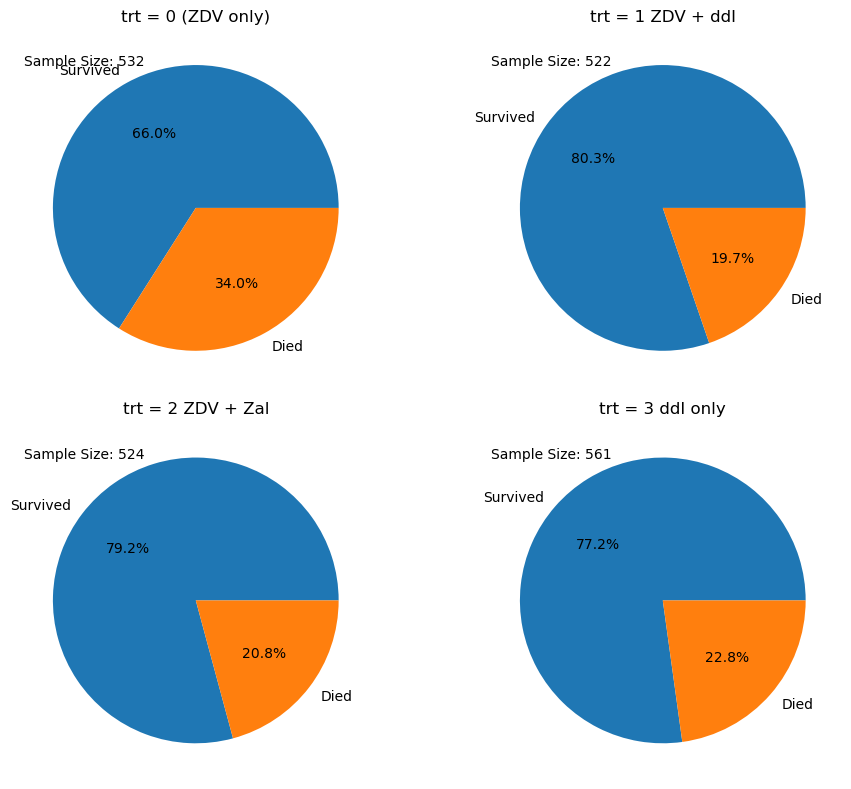

In [3]:
# Let's check the breakdown of outcomes for all treatment groups

import matplotlib.pyplot as plt

# Grouping y by trt and counting the occurrences
y_breakdown = y.groupby(X['trt']).value_counts().unstack()

# Plotting the breakdown as subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plotting the breakdown for trt = 0 as a pie chart
sizes_0 = y_breakdown.loc[0].values
axes[0, 0].pie(sizes_0, labels=['Survived', 'Died'], autopct='%1.1f%%')
axes[0, 0].set_title('trt = 0 (ZDV only)')
axes[0, 0].text(-1.2, 1, f'Sample Size: {sum(sizes_0)}', fontsize=10)

# Plotting the breakdown for trt = 1 as a pie chart
sizes_1 = y_breakdown.loc[1].values
axes[0, 1].pie(sizes_1, labels=['Survived', 'Died'], autopct='%1.1f%%')
axes[0, 1].set_title('trt = 1 ZDV + ddI')
axes[0, 1].text(-1.2, 1, f'Sample Size: {sum(sizes_1)}', fontsize=10)

# Plotting the breakdown for trt = 2 as a pie chart
sizes_2 = y_breakdown.loc[2].values
axes[1, 0].pie(sizes_2, labels=['Survived', 'Died'], autopct='%1.1f%%')
axes[1, 0].set_title('trt = 2 ZDV + Zal')
axes[1, 0].text(-1.2, 1, f'Sample Size: {sum(sizes_2)}', fontsize=10)

# Plotting the breakdown for trt = 3 as a pie chart
sizes_3 = y_breakdown.loc[3].values
axes[1, 1].pie(sizes_3, labels=['Survived', 'Died'], autopct='%1.1f%%')
axes[1, 1].set_title('trt = 3 ddI only')
axes[1, 1].text(-1.2, 1, f'Sample Size: {sum(sizes_3)}', fontsize=10)

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()

Looking at these numbers at face value, it looks like that trt = 0 (which is ZDV only), performs worse than the other 3 treatments. The best performance was achieved by treatment 1 (ZDV+ddI). Let's have a more in depth look into the demographics of the treatment groups.

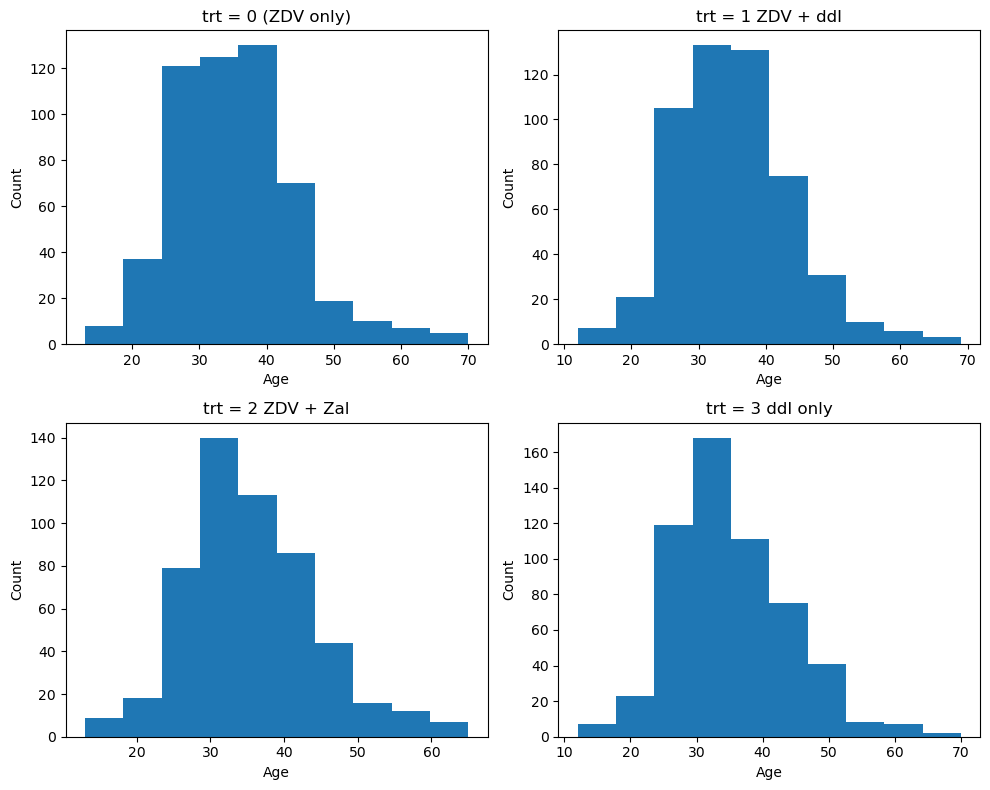

In [4]:
# Grouping the ages by treatment group and counting the occurrences
age_breakdown = X.groupby('trt')['age'].value_counts().unstack()

# Plotting the breakdown as subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plotting the breakdown for trt = 0 as a histogram
axes[0, 0].hist(X[X['trt'] == 0]['age'], bins=10)
axes[0, 0].set_title('trt = 0 (ZDV only)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plotting the breakdown for trt = 1 as a histogram
axes[0, 1].hist(X[X['trt'] == 1]['age'], bins=10)
axes[0, 1].set_title('trt = 1 ZDV + ddI')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

# Plotting the breakdown for trt = 2 as a histogram
axes[1, 0].hist(X[X['trt'] == 2]['age'], bins=10)
axes[1, 0].set_title('trt = 2 ZDV + Zal')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')

# Plotting the breakdown for trt = 3 as a histogram
axes[1, 1].hist(X[X['trt'] == 3]['age'], bins=10)
axes[1, 1].set_title('trt = 3 ddI only')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Count')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


In [5]:
# List the mean age for each treatment group
X.groupby('trt')['age'].mean()

trt
0    35.225564
1    35.229885
2    35.431298
3    35.115865
Name: age, dtype: float64

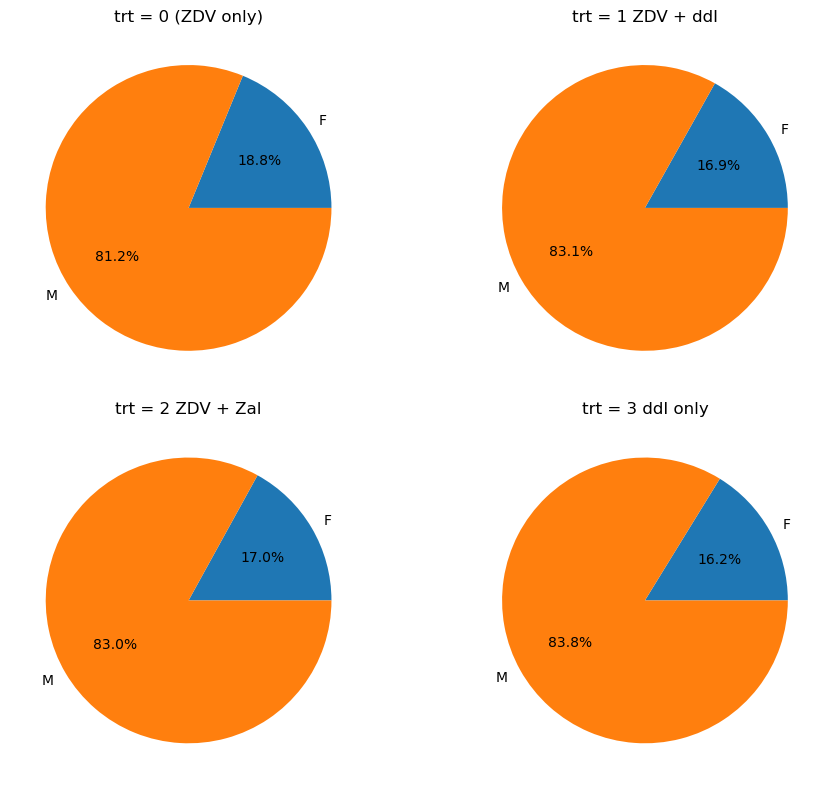

In [6]:
# Grouping the gender by treatment group and counting the occurrences
gender_breakdown = X.groupby('trt')['gender'].value_counts().unstack()

# Plotting the breakdown as subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plotting the breakdown for trt = 0 as a pie chart
sizes_0 = gender_breakdown.loc[0].values
labels_0 = ['F', 'M']
axes[0, 0].pie(sizes_0, labels=labels_0, autopct='%1.1f%%')
axes[0, 0].set_title('trt = 0 (ZDV only)')

# Plotting the breakdown for trt = 1 as a pie chart
sizes_1 = gender_breakdown.loc[1].values
labels_1 = ['F', 'M']
axes[0, 1].pie(sizes_1, labels=labels_1, autopct='%1.1f%%')
axes[0, 1].set_title('trt = 1 ZDV + ddI')

# Plotting the breakdown for trt = 2 as a pie chart
sizes_2 = gender_breakdown.loc[2].values
labels_2 = ['F', 'M']
axes[1, 0].pie(sizes_2, labels=labels_2, autopct='%1.1f%%')
axes[1, 0].set_title('trt = 2 ZDV + Zal')

# Plotting the breakdown for trt = 3 as a pie chart
sizes_3 = gender_breakdown.loc[3].values
labels_3 = ['F', 'M']
axes[1, 1].pie(sizes_3, labels=labels_3, autopct='%1.1f%%')
axes[1, 1].set_title('trt = 3 ddI only')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


The demographics of the four groups look very uniform!

Let's have a look at immune cell counts (cd4, and cd8) at the start and after 20 weeks for each tratment groups. We also calculated the difference to show improvements.

/var/folders/p2/19szx7gd5jbft0v3d0s11vdm0000gp/T/ipykernel_35093/3537547630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cd420_cd40_diff'] = X['cd420'] - X['cd40']


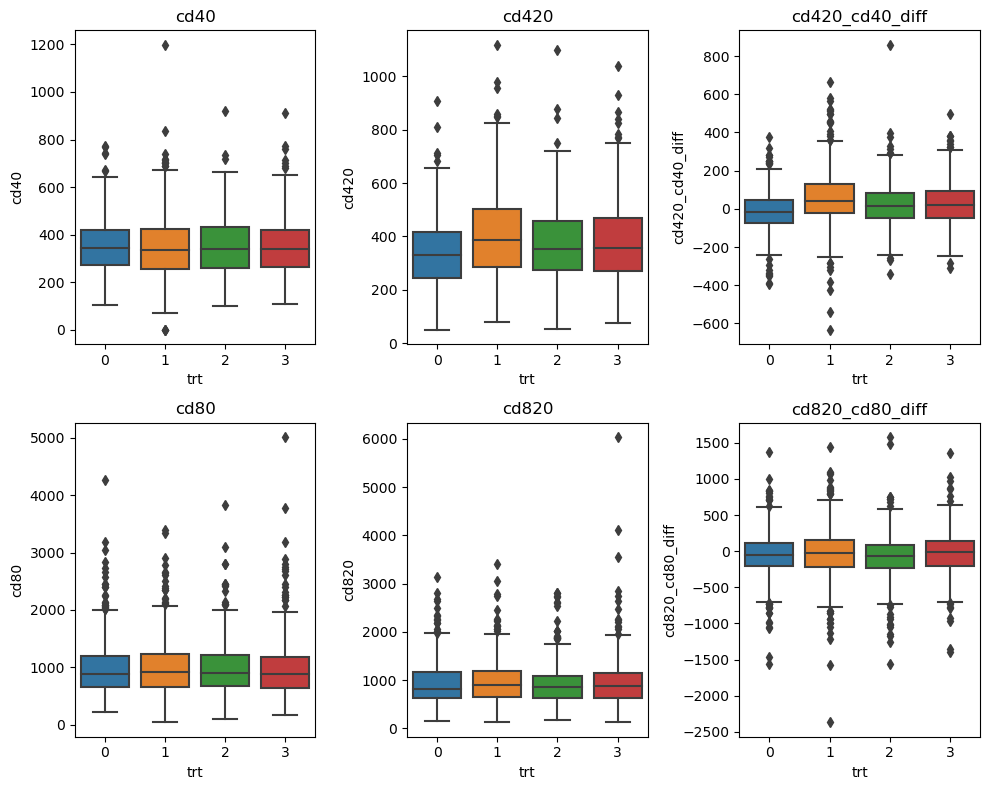

In [7]:
import seaborn as sns
cd420_breakdown = X.groupby('trt')['cd420']

X['cd420_cd40_diff'] = X['cd420'] - X['cd40']
X['cd820_cd80_diff'] = X['cd820'] - X['cd80']



# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# Create boxplots for cd40, cd420, cd80, and cd820
sns.boxplot(ax=axes[0, 0], x=X['trt'], y=X['cd40'])
axes[0, 0].set_title('cd40')

sns.boxplot(ax=axes[0, 1], x=X['trt'], y=X['cd420'])
axes[0, 1].set_title('cd420')

sns.boxplot(ax=axes[0, 2], x=X['trt'], y=X['cd420_cd40_diff'])
axes[0, 2].set_title('cd420_cd40_diff')

sns.boxplot(ax=axes[1, 0], x=X['trt'], y=X['cd80'])
axes[1, 0].set_title('cd80')

sns.boxplot(ax=axes[1, 1], x=X['trt'], y=X['cd820'])
axes[1, 1].set_title('cd820')

sns.boxplot(ax=axes[1, 2], x=X['trt'], y=X['cd820_cd80_diff'])
axes[1, 2].set_title('cd820_cd80_diff')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


Let's highlight the changes in the mean cell count values.

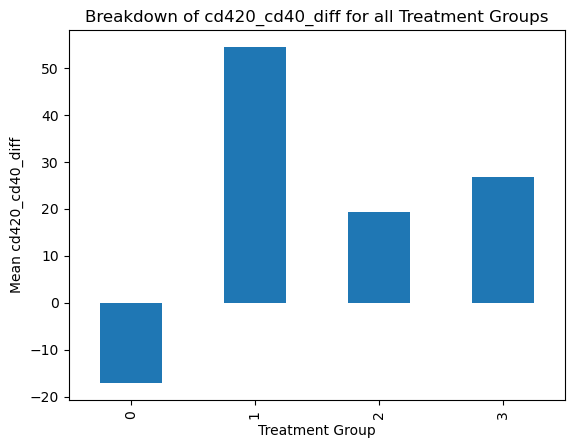

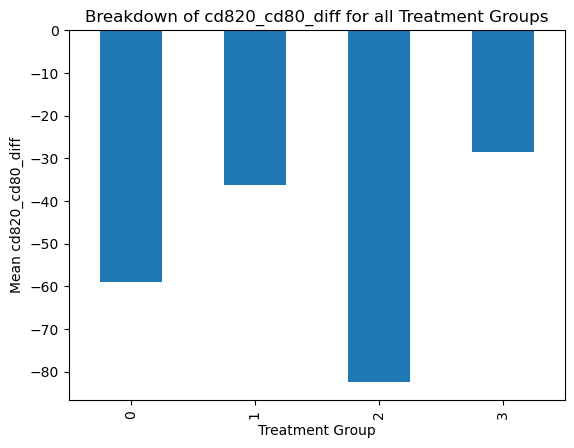

In [8]:
X['cd420_cd40_diff'] = X['cd420'] - X['cd40']
X['cd820_cd80_diff'] = X['cd820'] - X['cd80']

# Grouping cd420_cd40_diff by trt and calculating the mean
cd420_cd40_diff_breakdown = X.groupby('trt')['cd420_cd40_diff'].mean()

# Plotting the breakdown as a bar chart
cd420_cd40_diff_breakdown.plot(kind='bar')
plt.xlabel('Treatment Group')
plt.ylabel('Mean cd420_cd40_diff')
plt.title('Breakdown of cd420_cd40_diff for all Treatment Groups')
plt.show()

# Grouping cd820_cd80_diff by trt and calculating the mean
cd820_cd80_diff_breakdown = X.groupby('trt')['cd820_cd80_diff'].mean()

# Plotting the breakdown as a bar chart
cd820_cd80_diff_breakdown.plot(kind='bar')
plt.xlabel('Treatment Group')
plt.ylabel('Mean cd820_cd80_diff')
plt.title('Breakdown of cd820_cd80_diff for all Treatment Groups')
plt.show()

CD4 improved in all groups but trteatment == 0 (ZDV only), CD8 got worse to various degrees.

In [9]:
# get the ratio of male (gender)
male = sum(X['gender'])/len(X)
female = 1-male

print("The ratio of male patients is", male, "and the ratio of female patients is", female)

The ratio of male patients is 0.8279569892473119 and the ratio of female patients is 0.17204301075268813


The mean age is 35.24824684431977 the median age is 34.0 and the standard deviation of the age is 8.709026234008716
The mean age for males is  35.44155844155844 the median age is  34.0 and the standard deviation of the age is  8.793317355370533
The mean age for females is  34.317934782608695 the median age is  33.0 and the standard deviation of the age is  8.2395672008826


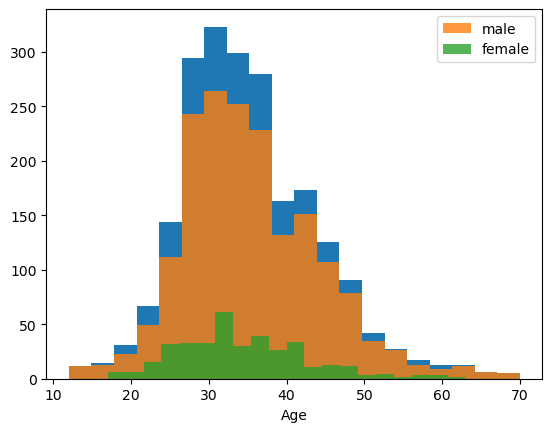

In [10]:
# make a histogram of the age distribution
import matplotlib.pyplot as plt
plt.hist(X['age'], bins=20)
plt.xlabel('Age')

# get the mean, median and standard deviation of the age
mean_age = X['age'].mean()
median_age = X['age'].median()
std_age = X['age'].std()

print("The mean age is", mean_age, "the median age is", median_age, "and the standard deviation of the age is", std_age)

Xmale = X[X["gender"]==1]
Xfemale = X[X["gender"]==0]

# make a histogram of the age distribution
plt.hist(Xmale['age'], bins=20, alpha=0.8, label="male")
plt.hist(Xfemale['age'], bins=20, alpha=0.8, label="female")
plt.xlabel('Age')
plt.legend(loc='upper right')

# get the mean, median and standard deviation of the age
mean_age_male = Xmale['age'].mean()
median_age_male = Xmale['age'].median()
std_age_male = Xmale['age'].std()

mean_age_female = Xfemale['age'].mean()
median_age_female = Xfemale['age'].median()
std_age_female = Xfemale['age'].std()

print("The mean age for males is ", mean_age_male, "the median age is ", median_age_male, "and the standard deviation of the age is ", std_age_male)
print("The mean age for females is ", mean_age_female, "the median age is ", median_age_female, "and the standard deviation of the age is ", std_age_female)



Text(0, 0.5, '')

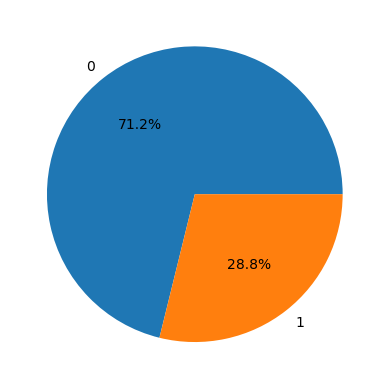

In [11]:
# make a pie chart of race in X
Xrace = X['race']
Xrace = Xrace.value_counts()
Xrace.plot.pie(autopct="%.1f%%")
plt.ylabel('')

In [12]:
#Make a count of risk factors homo, hemo and drugs
homo = sum(X["homo"])/len(X)
hemo = sum(X["hemo"])/len(X)
drugs = sum(X["drugs"])/len(X)

print(homo, hemo, drugs)

homo_male = sum(Xmale["homo"])/len(Xmale)
hemo_male = sum(Xmale["hemo"])/len(Xmale)
drugs_male = sum(Xmale["drugs"])/len(Xmale)

print(homo_male, hemo_male, drugs_male)

homo_female = sum(Xfemale["homo"])/len(Xfemale)
hemo_female = sum(Xfemale["hemo"])/len(Xfemale)
drugs_female = sum(Xfemale["drugs"])/len(Xfemale)

print(homo_female, hemo_female, drugs_female)

0.6610565684899485 0.08415147265077139 0.131369798971482
0.7922077922077922 0.09881422924901186 0.10954263128176171
0.029891304347826088 0.01358695652173913 0.23641304347826086


Demographically, the male population has a very high proportion of homosexuals as opposed to females where this number is low. The number of hemophuliac patients is also considerably higher than in the female group. In contrast, drug use is higher in the female patient group. Making a note of these biases as they may be relevant when interpreting the results.

## Preprocessing

We would like to predict patient outcomes from early (up ubtil week20) data, so removing time as the idicates how long the patie4nt has been involved in the programme (and as it turns out it is also a very good predictor for patient fatality since most churn seems to be due to death).

Also removing the fields, **zprior**, **str2** and **treat** since these are redundant to other fields.

We also create a version of the database *X_bin*, where non-binary categorical variables are biarised.

In [13]:
# exclude columns from X
X = X.drop(columns=['time'])
X = X.drop(columns=['zprior'])
X = X.drop(columns=['str2'])
X = X.drop(columns=['treat'])

# copy X to new variable
X_bin = X.copy()

# binarise strat column
X_bin = pd.get_dummies(X_bin, columns=['strat'])
X_bin = X_bin.drop(columns=['strat_1'])

# binarise trt column
X_bin = pd.get_dummies(X_bin, columns=['trt'])
X_bin = X_bin.drop(columns=['trt_0'])


Creating a training and a test dataset.

In [14]:
# split to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y, test_size=0.25, random_state=0)

## k-nearest neigbours method

/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Accuracy: 0.7700934579439253


/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expe

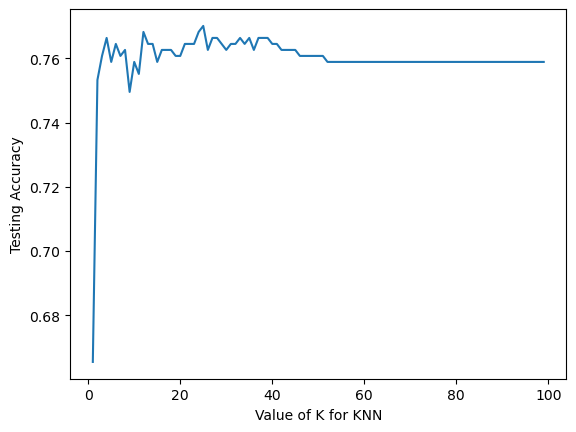

In [15]:
# using k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_bin_train)

# Now apply the transformations to the data:
X_train_kNN = scaler.transform(X_bin_train)
X_test_kNN = scaler.transform(X_bin_test)
y_train_kNN = y_bin_train
y_test_kNN = y_bin_test


knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_kNN, y_train_kNN)
y_pred = knn.predict(X_test_kNN)

# accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_kNN, y_pred))

# Find the best k value:

# test k = 1 to 100
k_range = range(1, 100)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_kNN, y_train_kNN)
    y_pred = knn.predict(X_test_kNN)
    scores[k] = metrics.accuracy_score(y_test_kNN, y_pred)
    scores_list.append(metrics.accuracy_score(y_test_kNN, y_pred))

import matplotlib.pyplot as plt
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()


The best k is 25
Accuracy: 0.7700934579439253


/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


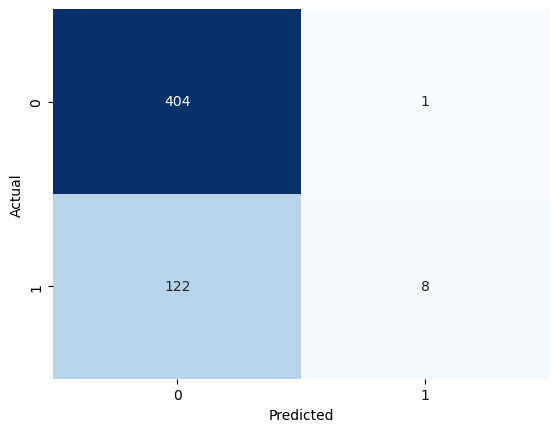

Sensitivity :  0.7680608365019012
Specificity :  0.8888888888888888


In [17]:
# get best k
max(scores_list)
scores_list.index(max(scores_list))
kbest = k_range[scores_list.index(max(scores_list))]
print("The best k is", kbest)

# get accuracy for best k
knn = KNeighborsClassifier(n_neighbors=kbest)
knn.fit(X_train_kNN, y_train_kNN)
y_pred = knn.predict(X_test_kNN)
print("Accuracy:",metrics.accuracy_score(y_test_kNN, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_kNN, y_pred)

# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
# import confusion_matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_kNN, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# sensitivity and specificity
total=sum(sum(conf_mat))
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Specificity : ', specificity)

## Decision tree model

Accuracy with single decision tree: 0.6878504672897197


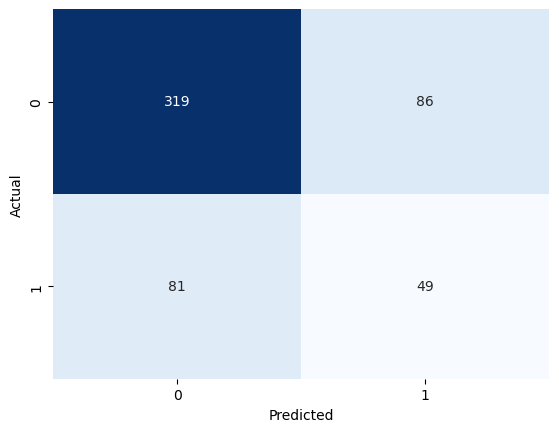

Sensitivity :  0.7975
Specificity :  0.362962962962963


In [18]:
# using regression tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy with single decision tree:",metrics.accuracy_score(y_test, y_pred))

# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# sensitivity and specificity
total=sum(sum(conf_mat))
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Specificity : ', specificity)


## Random forest

Let't take this further and have a random forest. This way we can also find out what the most important features are.

/var/folders/p2/19szx7gd5jbft0v3d0s11vdm0000gp/T/ipykernel_35093/354828317.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Accuracy with Random forest: 0.7925233644859813


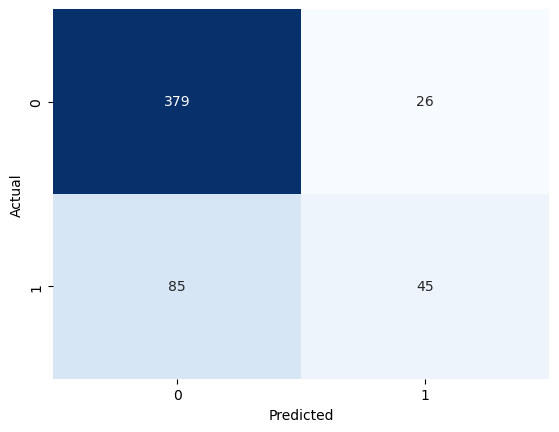

Sensitivity :  0.8168103448275862
Specificity :  0.6338028169014085


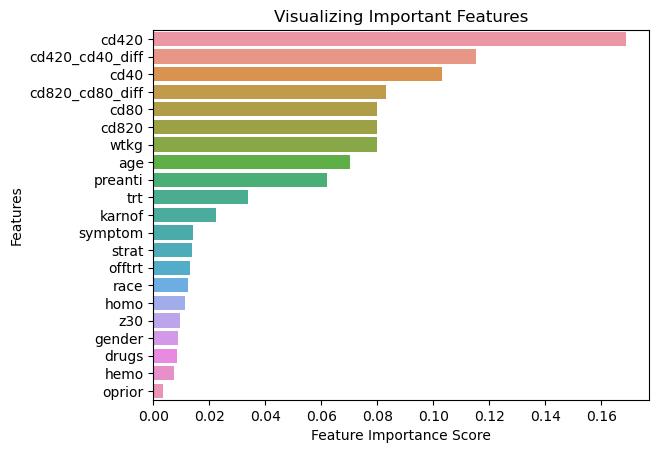

In [20]:
# using random forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy with Random forest:",metrics.accuracy_score(y_test, y_pred))

# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# sensitivity and specificity
total=sum(sum(conf_mat))
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Specificity : ', specificity)

# display feature importance
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Logistic regression

Accuracy with Logistic regression: 0.788785046728972


/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


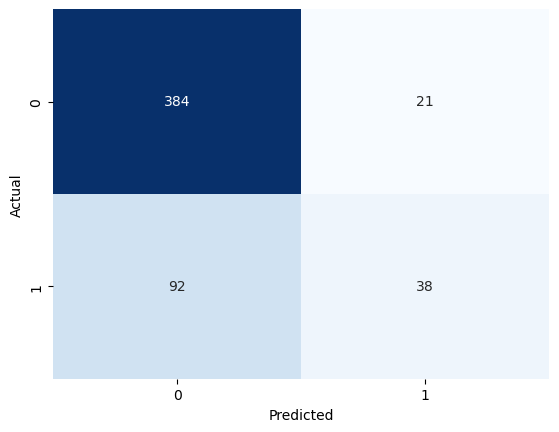

Sensitivity :  0.8067226890756303
Specificity :  0.6440677966101694


In [21]:
# using logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_bin_train)

# Now apply the transformations to the data:
X_train_sc = scaler.transform(X_bin_train)
X_test_sc = scaler.transform(X_bin_test)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_sc, y_train)
y_pred = logisticRegr.predict(X_test_sc)
print("Accuracy with Logistic regression:",metrics.accuracy_score(y_test, y_pred))

# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# sensitivity and specificity
total=sum(sum(conf_mat))
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Specificity : ', specificity)

/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with SVM: 0.7775700934579439


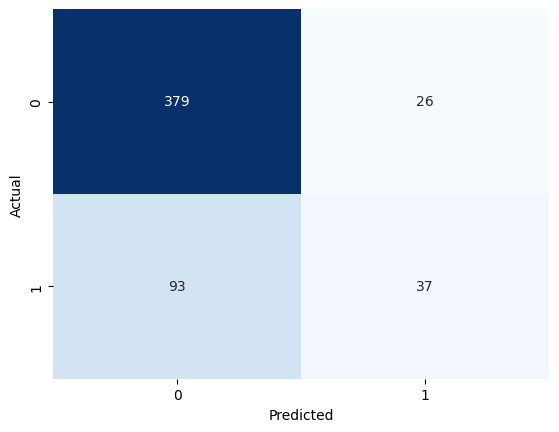

Sensitivity :  0.8029661016949152
Specificity :  0.5873015873015873


In [23]:
# using SVM
from sklearn.svm import SVC

scaler = StandardScaler()
scaler.fit(X_bin_train)

# # Now apply the transformations to the data:
X_train_svm = X_bin_train
X_test_svm = X_bin_test

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_svm, y_train)
y_pred = svclassifier.predict(X_test_svm)
print("Accuracy with SVM:",metrics.accuracy_score(y_test, y_pred))

# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# sensitivity and specificity
total=sum(sum(conf_mat))
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Specificity : ', specificity)

## Naive Bayes

Accuracy with Naive Bayes: 0.7514018691588785


/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


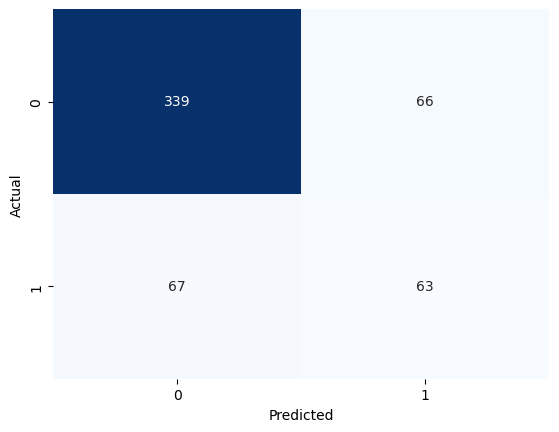

Sensitivity :  0.8349753694581281
Specificity :  0.4883720930232558
[[0.88204657 0.11795343]
 [0.98653776 0.01346224]
 [0.85839156 0.14160844]
 ...
 [0.35690293 0.64309707]
 [0.51831264 0.48168736]
 [0.99892062 0.00107938]]


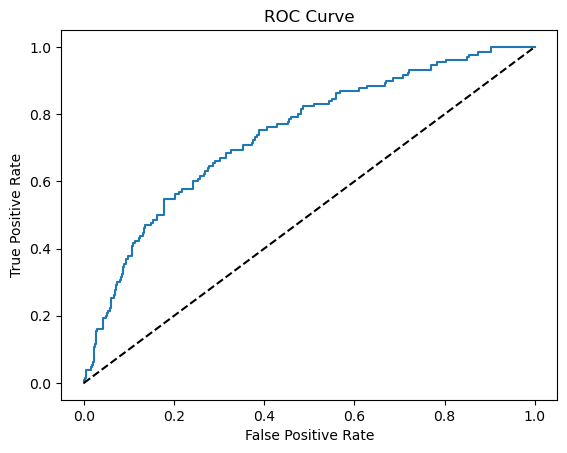

In [25]:
# using Naive Bayes
from sklearn.naive_bayes import GaussianNB
import numpy as np

scaler = StandardScaler()
scaler.fit(X_train)

# # Now apply the transformations to the data:
X_train_nb = scaler.transform(X_train)
X_test_nb = scaler.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train_nb, y_train)
y_pred = gnb.predict(X_test_nb)
print("Accuracy with Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# sensitivity and specificity
total=sum(sum(conf_mat))
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Specificity : ', specificity)

y_pred_proba = gnb.predict_proba(X_test_nb)
print(y_pred_proba)

# ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC

y_pred_proba_df = pd.DataFrame(y_pred_proba)
y_pred_proba_df.columns = ['Died', 'Survived']



y_test_df = pd.DataFrame(y_test.to_numpy())
y_test_df.columns = ['Survived (actual)']

df_with_prob = pd.concat([pd.DataFrame(X_test_nb), y_pred_proba_df], axis=1)
df_with_prob = pd.concat([df_with_prob, y_test_df], axis=1)

# merge with X_test_nb with y_pred_proba_df


#X_test_nb_with_proba = np.hstack((X_test_nb, y_pred_proba))

#X_test_nb_with_proba_df = pd.DataFrame(X_test_nb_with_proba)


/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with Neural Network: 0.7682242990654206


/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sberegi/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:109

Best parameters found:  OrderedDict([('activation', 'tanh'), ('alpha', 0.01), ('hidden_layer_sizes', 66), ('learning_rate', 'adaptive'), ('solver', 'adam')])
Accuracy with Neural Network with best parameters found:  0.7551401869158878


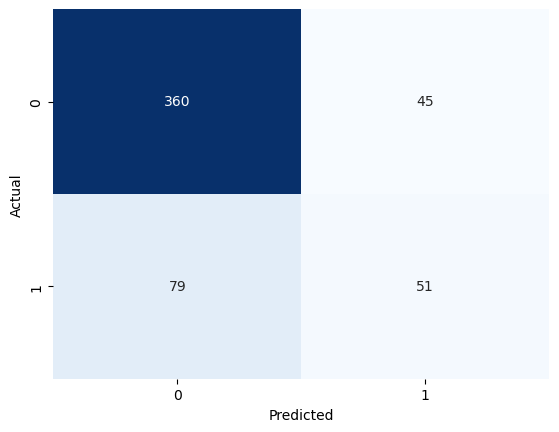

Sensitivity :  0.8200455580865603
Specificity :  0.53125


In [31]:
# using Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=100000)

scaler = StandardScaler()
scaler.fit(X_train)

# # Now apply the transformations to the data:
X_train_nn = scaler.transform(X_train)
X_test_nn = scaler.transform(X_test)


mlp.fit(X_train_nn, y_train)
y_pred = mlp.predict(X_test_nn)
print("Accuracy with Neural Network:",metrics.accuracy_score(y_test, y_pred))

# use Bayesian optimization to find the best hyperparameters for the neural network

from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
from skopt.space import Real, Categorical, Integer
import numpy as np

# setting up the parameter space
param_space = {
    'hidden_layer_sizes': Integer(1,100),
    'activation': Categorical(['tanh', 'relu']),
    'solver': Categorical(['sgd', 'adam']),
    'alpha': Real(1e-5, 1e-2, prior='log-uniform'),
    'learning_rate': Categorical(['constant', 'adaptive']),
}

# setting up the optimizer
opt = BayesSearchCV(
    mlp, 
    param_space, 
    n_iter=100, 
    random_state=0,
    cv=StratifiedKFold(5),
    n_jobs=-1
)

# perform the search
np.int = int
opt.fit(X_train, y_train)

# print the best parameters found
print("Best parameters found: ", opt.best_params_)
print("Accuracy with Neural Network with best parameters found: ", opt.score(X_test, y_test))


# plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# sensitivity and specificity
total=sum(sum(conf_mat))
sensitivity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
print('Sensitivity : ', sensitivity )

specificity = conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])
print('Specificity : ', specificity)

